To be run in `pygmt`

In [ ]:
import json
import pygmt

file = '/Users/hyin/shakemap_profiles/default/data/us6000qw60/v_current_2025-07-31/rupture.json'

# Read the JSON file
with open(file, 'r') as f:
    data = json.load(f)
# Navigate to the coordinates array
coordinates = data["features"][0]["geometry"]["coordinates"]
corners = coordinates[0][0]  # First polygon, first ring

# Extract the x and y coordinates from the corners
x = [corners[0][0], corners[1][0], corners[2][0], corners[3][0], corners[4][0]]
y = [corners[0][1], corners[1][1], corners[2][1], corners[3][1], corners[4][1]]


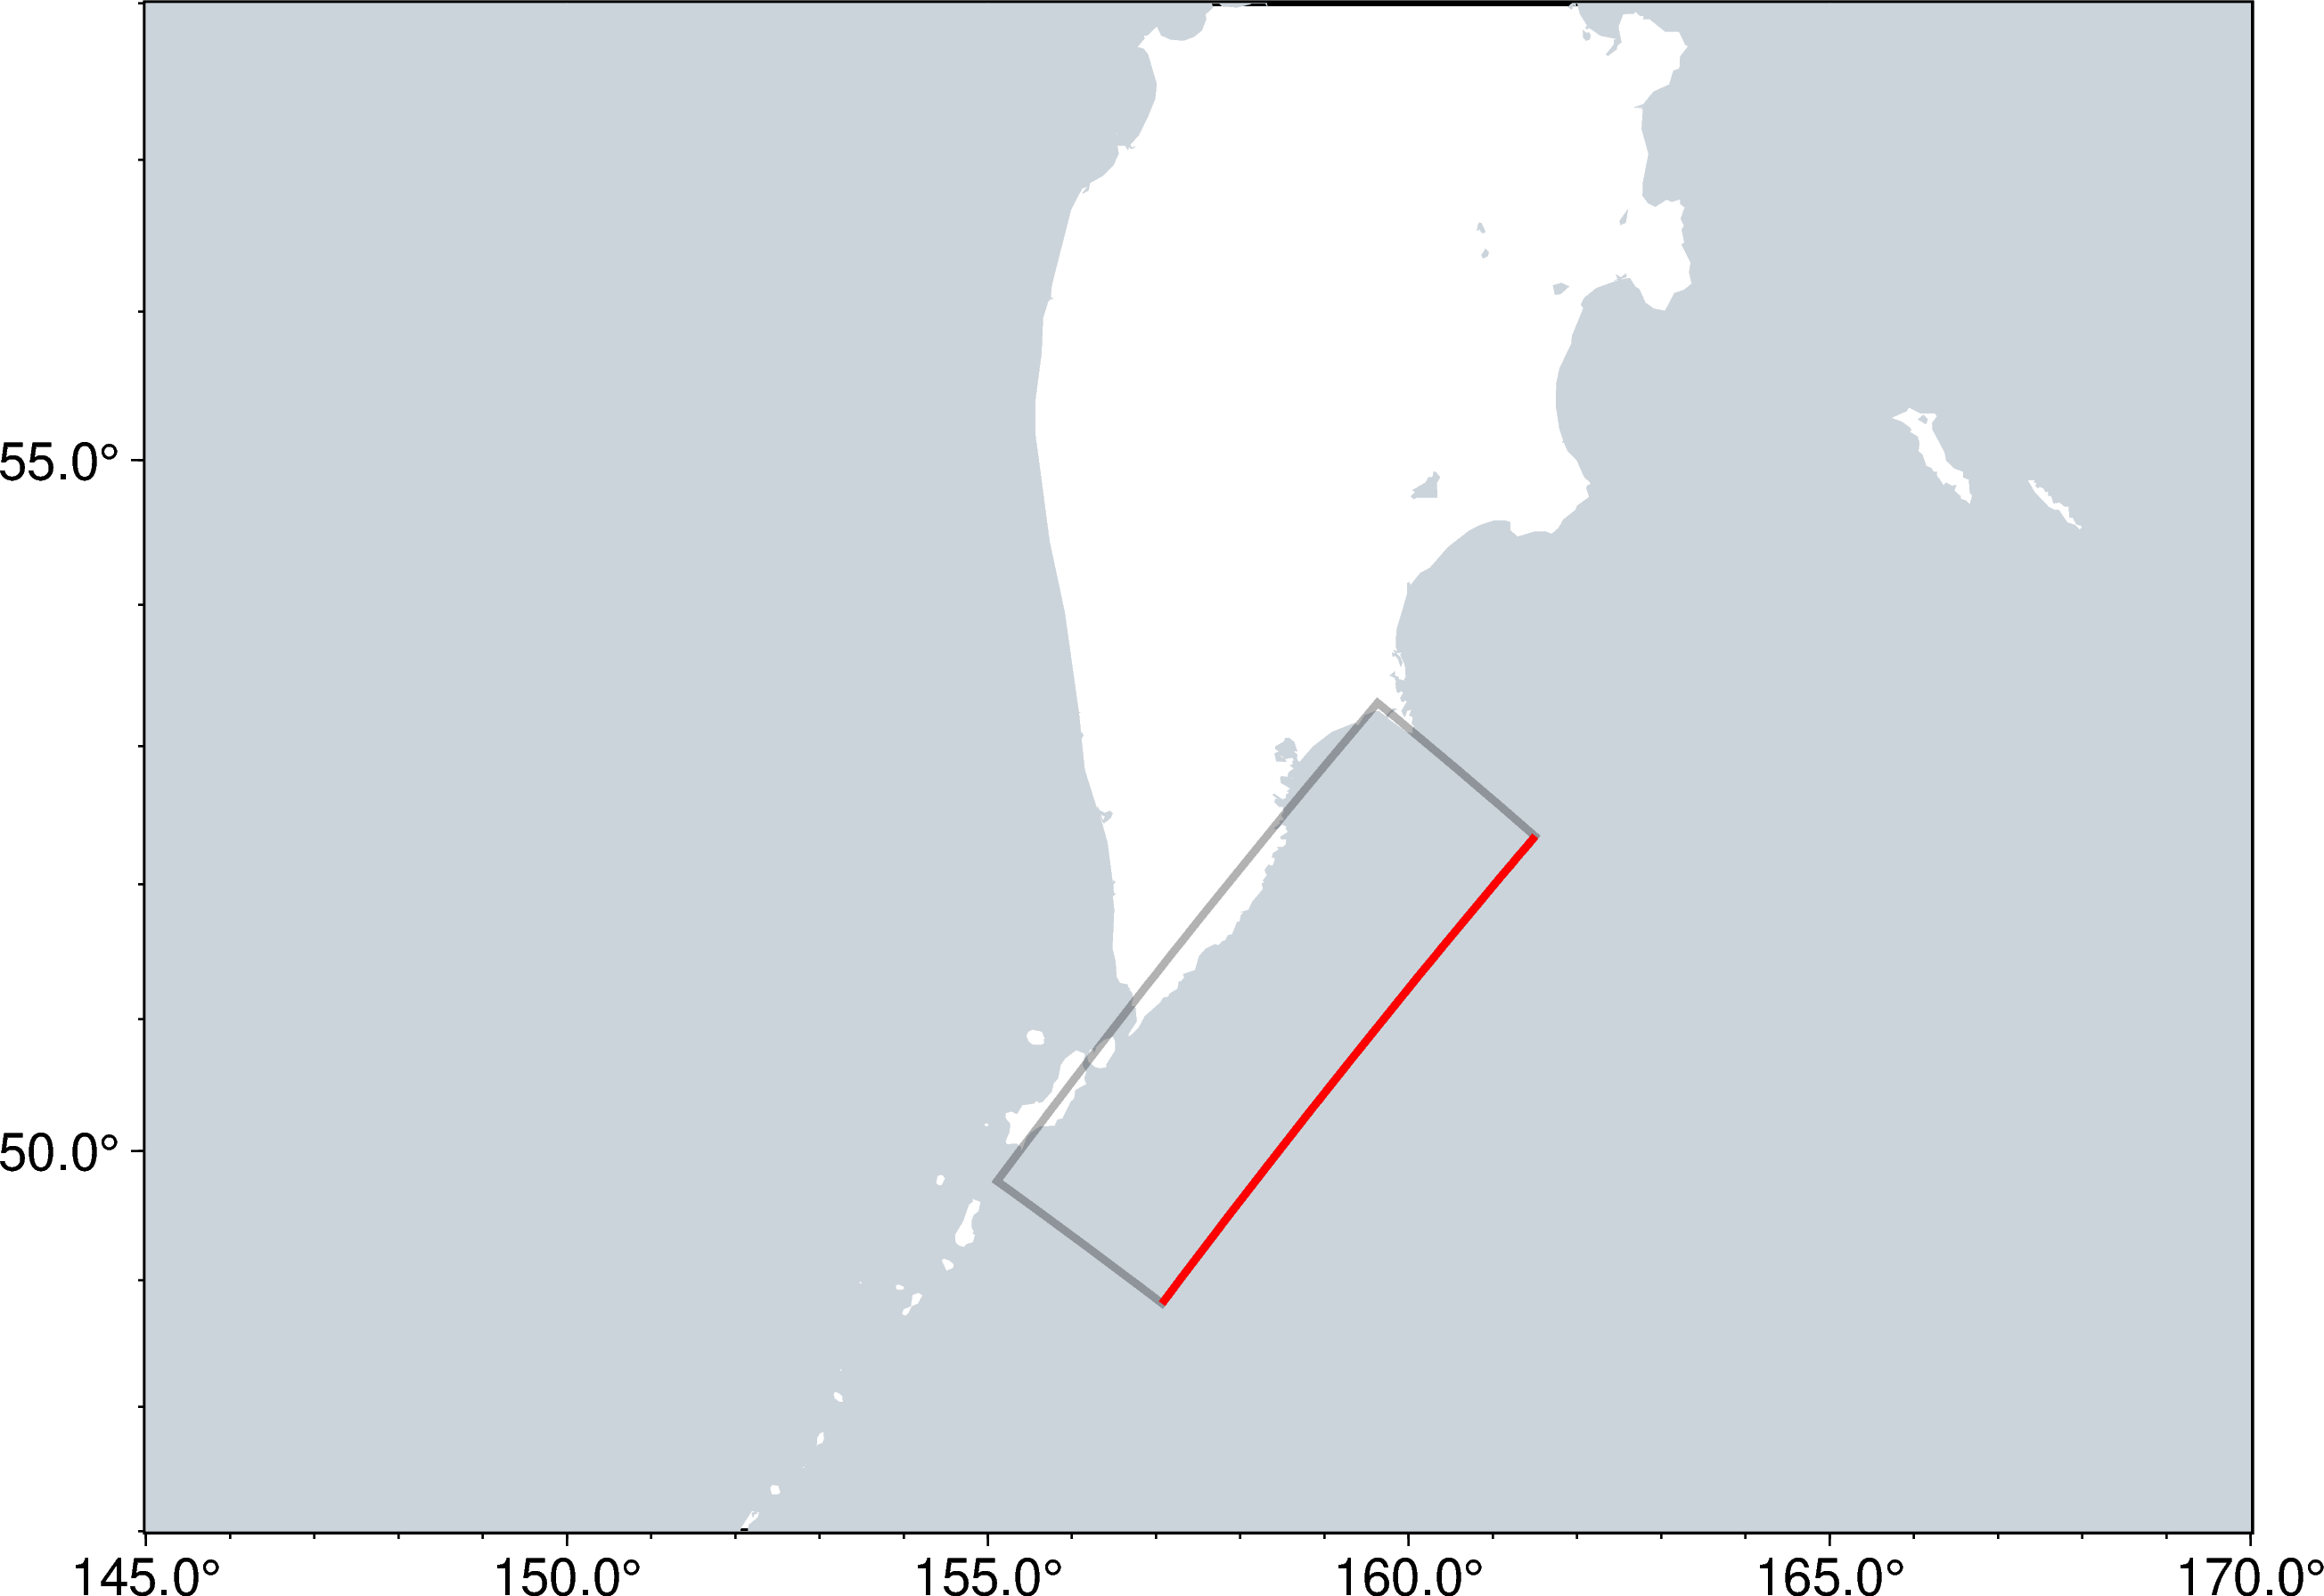

In [41]:
# Initialize figure
fig = pygmt.Figure()
# Set PyGMT universal configurations
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT="14p")
projection = 'M0/0/20c'
rgn = [145, 170, 47, 58] # [xmin,xmax,ymin,ymax]
fig.basemap(region=rgn, projection=projection, frame=True)
fig.coast(shorelines=False, region=rgn, projection=projection, water='204/212/219')

# Plot the outline of the rupture plane
fig.plot(x=x, y=y, pen='2p,black', label="Fault Line", transparency=70)
# Highlight the updip edge
fig.plot(x=x[0:2], y=y[0:2], pen='2p,red', label="Fault Line", transparency=0)

fig.show()